In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
dataset = load_dataset("amazon_polarity")
train_texts = [f"{t} {c}" for t, c in zip(dataset["train"]["title"][:2000], dataset["train"]["content"][:2000])]
train_labels = dataset["train"]["label"][:2000]

test_texts = [f"{t} {c}" for t, c in zip(dataset["test"]["title"][:1000], dataset["test"]["content"][:1000])]
test_labels = dataset["test"]["label"][:1000]


In [5]:
# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)
train_seq = pad_sequences(tokenizer.texts_to_sequences(train_texts), maxlen=200)
test_seq = pad_sequences(tokenizer.texts_to_sequences(test_texts), maxlen=200)


In [6]:
# Model
model = Sequential([
    Embedding(10000, 16, input_length=200),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


D:\Workspace\rb\sample-tracker-api\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# Train
history = model.fit(np.array(train_seq), np.array(train_labels), epochs=100, validation_data=(np.array(test_seq), np.array(test_labels)))


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4981 - loss: 0.6935 - val_accuracy: 0.5780 - val_loss: 0.6916
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5966 - loss: 0.6894 - val_accuracy: 0.4980 - val_loss: 0.6873
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6295 - loss: 0.6789 - val_accuracy: 0.5230 - val_loss: 0.6747
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6825 - loss: 0.6543 - val_accuracy: 0.6100 - val_loss: 0.6521
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7496 - loss: 0.6101 - val_accuracy: 0.6640 - val_loss: 0.6226
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7989 - loss: 0.5648 - val_accuracy: 0.6360 - val_loss: 0.6112
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8033 - loss: 0.5042 - val_accuracy: 0.7470 - val_loss: 0.5460
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8699 - loss: 0.4343 - val_accuracy: 0.7260 - v

In [8]:
# Evaluate
preds = (model.predict(test_seq) > 0.5).astype("int32")
report = classification_report(test_labels, preds, output_dict=False)
print(report)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.77      0.87      0.81       498
           1       0.85      0.74      0.79       502

    accuracy                           0.80      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.80      0.80      1000



In [9]:
# Save
model.save("sentiment_model_amazon.h5")


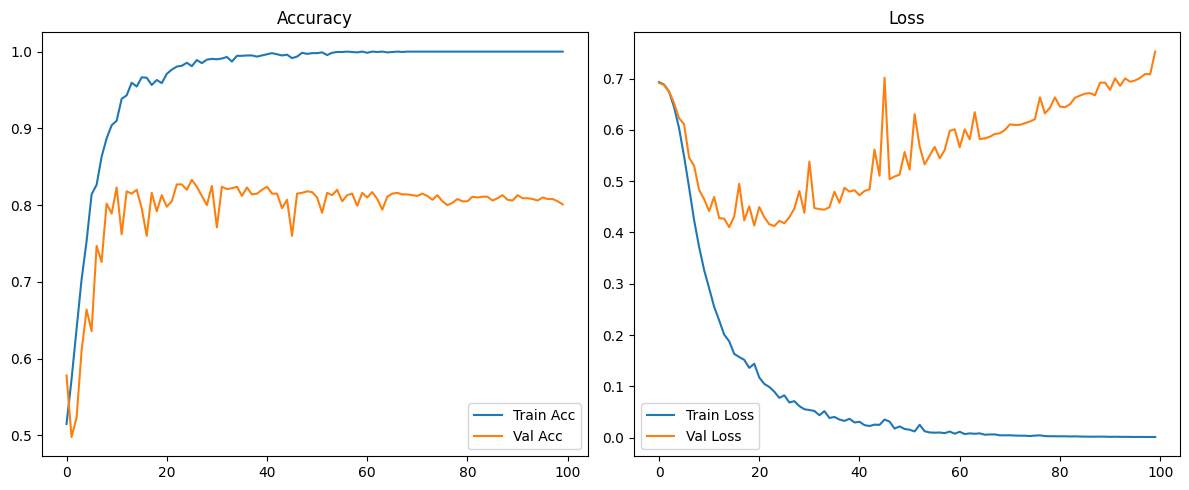

In [10]:
# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()
